In [17]:
import pandas as pd
path = "../Daten/Hypo_Phanto_Vgl.xlsx"

In [18]:
df = pd.read_excel(path)
df.head()

,Patientennummer,Identifikation,Schwelle,Diskrimination,Sprays,16er,Alter,Geschlecht,Gewicht (kg),Schmeckstörung ätherischer Geschmack,...,Suess_Pz_Lat_P2,Suess_Pz_Amp_p2,Suess_C3_Lat_p2,Suess_C3 _Amp_p2,Suess_C4_Lat_p2,Suess_C4_Amp_p2,Suess_P3_Lat_p2,Suess_P3_Amp_p2,Suess_P4_Lat_P2,Suess_P4_Amp_p2
0,118,6,1.0,8.0,4,6,71,1,77.0,0,...,875.0,3404.0,874.0,5561000.0,878.0,6749000.0,875.0,5342.0,857.0,-593999.0
1,122,8,1.0,11.0,4,9,58,2,80.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,131,2,1.0,6.0,4,9,71,2,67.0,0,...,924.0,4284.0,924.0,3927.0,923.0,3712.0,924.0,4927.0,923.0,5855.0
3,133,11,NaN,NaN,3,8,64,2,87.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,135,13,NaN,NaN,3,6,77,2,89.0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
df.shape

(37, 114)

In [20]:
df = df.drop_duplicates(subset='Patientennummer')

In [21]:
df.shape

(30, 114)

In [25]:
print(df.columns.tolist())

['Patientennummer', 'Identifikation', 'Schwelle', 'Diskrimination', 'Sprays', '16er', 'Alter', 'Geschlecht', 'Gewicht (kg)', 'Schmeckstörung ätherischer Geschmack', 'Schmeckstörung Hypogeusie', 'Schmeckstörung metall. Phantogeusie', 'Schmeckstörung salzig Phantogeusie', 'Schmeckstörung bitter Phantogeusie', 'Schmeckstörung süß Phantogeusie', 'Schmeckstörung sauer Phantogeusie', 'Schmeckstörung fauliger Geschmack', 'Schmeckstörung nicht definierbarer Geschmack', 'Salz_Cz_Lat_P1', 'Salz_Cz_Amp_P1', 'Salz_Fp2_Lat_P1', 'Salz_Fp2_Amp_P1', 'Salz_Fz_Lat_P1', 'Salz_Fz_Amp_P1', 'Salz_Pz_Lat_P1', 'Salz_Pz_Amp_P1', 'Salz_C3_Lat_P1', 'Salz_C3 _Amp_P1', 'Salz_C4_Lat_P1', 'Salz_C4_Amp_P1', 'Salz_P3_Lat_P1', 'Salz_P3_Amp_P1', 'Salz_P4_Lat_P1', 'Salz_P4_Amp_P1', 'Salz_Cz_Lat_N1', 'Salz_Cz_Amp_N1', 'Salz_Fp2_Lat_N1', 'Salz_Fp2_Amp_N1', 'Salz_Fz_Lat_N1', 'Salz_Fz_Amp_N1', 'Salz_Pz_Lat_N1', 'Salz_Pz_Amp_N1', 'Salz_C3_Lat_N1', 'Salz_C3 _Amp_N1', 'Salz_C4_Lat_N1', 'Salz_C4_Amp_N1', 'Salz_P3_Lat_N1', 'Salz_

## Compare patients that exclusively have either Phantogeusie or a Hypogeusie

In [61]:
df_hypo = df[(df["Schmeckstörung Hypogeusie"] == 1) & (df['Schmeckstörung ätherischer Geschmack'] == 0) 
            & (df['Schmeckstörung metall. Phantogeusie'] == 0) & (df['Schmeckstörung salzig Phantogeusie'] == 0) 
            & (df['Schmeckstörung bitter Phantogeusie'] == 0) & (df['Schmeckstörung süß Phantogeusie'] == 0)
            & (df['Schmeckstörung sauer Phantogeusie'] == 0) & (df['Schmeckstörung fauliger Geschmack'] == 0)
            & (df['Schmeckstörung nicht definierbarer Geschmack'] == 0)]

df_phanto = df[df["Schmeckstörung Hypogeusie"] == 0]

In [62]:
df_hypo.shape

(3, 114)

In [37]:
df_phanto.shape

(20, 114)

## Compare patients that have a Phantogeusie and/or a Hypogeusie

In [59]:
df_hypo = df[df["Schmeckstörung Hypogeusie"] == 1]
df_phanto = df[df["Schmeckstörung Hypogeusie"] == 0]

In [42]:
df_hypo.shape

(10, 114)

In [43]:
df_phanto.shape

(20, 114)

In [53]:
from scipy import stats

# T-Test, Signifikanzniveau p= 0,05
array_a = "Salz_Cz_Lat_P1"
array_b = "Salz_Cz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=0.5030806368757069, pvalue=0.6206895802987984)

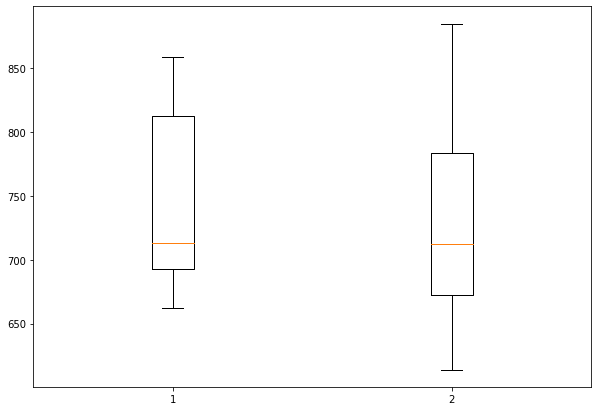

In [49]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([array_a, array_b])
 
# show plot
plt.show()

In [50]:
# T-Test, Signifikanzniveau p= 0,05
array_a = "Salz_Fz_Lat_P1"
array_b = "Salz_Fz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=0.3176339968759969, pvalue=0.7542268901660029)

In [51]:
array_a = "Salz_Pz_Lat_P1"
array_b = "Salz_Pz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=0.1374049603772552, pvalue=0.8922360372463407)

In [65]:
array_a = "Salz_Cz_Lat_P1"
array_b = "Salz_Cz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result


Ttest_indResult(statistic=0.8815464911406596, pvalue=0.3919293729344039)

In [66]:
array_a = "Salz_Cz_Lat_N1"
array_b = "Salz_Cz_Lat_N1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result


Ttest_indResult(statistic=0.41262513455813377, pvalue=0.6857185931758963)

In [67]:
array_a = "Salz_Pz_Lat_N1"
array_b = "Salz_Pz_Lat_N1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result


Ttest_indResult(statistic=0.13041638349827103, pvalue=0.8980924072179107)

In [68]:
array_a = "Salz_Fz_Lat_N1"
array_b = "Salz_Fz_Lat_N1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result


Ttest_indResult(statistic=0.07018858858400559, pvalue=0.9449707652352903)

In [71]:
array_a = "Salz_Cz_Lat_p2"
array_b = "Salz_Cz_Lat_p2"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result


Ttest_indResult(statistic=0.12076224104953995, pvalue=0.9054821468081682)

In [74]:
array_a = "Salz_Pz_Lat_P2"
array_b = "Salz_Pz_Lat_P2"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result


Ttest_indResult(statistic=-0.45967640080571776, pvalue=0.6523404914278774)

In [75]:
array_a = "Salz_Fz_Lat_P2"
array_b = "Salz_Fz_Lat_P2"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=-0.21991009075972304, pvalue=0.8289059556880499)

In [76]:
array_a = "Suess_Cz_Lat_P1"
array_b = "Suess_Cz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=3.0512453808679574, pvalue=0.011022955402953073)

In [77]:
array_a = "Suess_Pz_Lat_P1"
array_b = "Suess_Pz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=3.170827664828931, pvalue=0.008905475595728119)

In [78]:
array_a = "Suess_Fz_Lat_P1"
array_b = "Suess_Fz_Lat_P1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=3.1020553436079457, pvalue=0.01006715179728161)

In [79]:
array_a = "Suess_Cz_Lat_N1"
array_b = "Suess_Cz_Lat_N1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=2.694361621862068, pvalue=0.019511812953359412)

In [80]:
array_a = "Suess_Pz_Lat_N1"
array_b = "Suess_Pz_Lat_N1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=2.7303278311429082, pvalue=0.018255409495619213)

In [81]:
array_a = "Suess_Fz_Lat_N1"
array_b = "Suess_Fz_Lat_N1"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=2.706178381803781, pvalue=0.0190899083532071)

In [83]:
array_a = "Suess_Cz_Lat_p2"
array_b = "Suess_Cz_Lat_p2"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=0.9476307388015287, pvalue=0.3620108427435337)

In [85]:
array_a = "Suess_Pz_Lat_P2"
array_b = "Suess_Pz_Lat_P2"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=0.9033034840206486, pvalue=0.3841395469991402)

In [87]:
array_a = "Suess_Fz_Lat_P2"
array_b = "Suess_Fz_Lat_P2"
array_a = df_hypo[array_a].dropna()
array_b = df_phanto[array_b].dropna()

result = stats.ttest_ind(array_a, array_b)
result

Ttest_indResult(statistic=1.00004549550008, pvalue=0.3370279275632657)